In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewtest

In [4]:
X_data = pd.read_pickle("x_data.pkl")
y_class = pd.read_pickle("y_class.pkl")
y_data = pd.read_pickle("y_data.pkl")

In [5]:
print(X_data.shape,y_data.shape, y_class.shape, list(set(y_class)))
#print(x_data.head())

(47, 3650) (47,) (47,) [0, 1]


In [4]:
#!pip install --upgrade pip
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\ra029810\appdata\local\continuum\anaconda3\lib\site-packages (0.3.3)
Requirement not upgraded as not directly required: scikit-learn in c:\users\ra029810\appdata\local\continuum\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)
Requirement not upgraded as not directly required: scipy in c:\users\ra029810\appdata\local\continuum\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)
Requirement not upgraded as not directly required: numpy in c:\users\ra029810\appdata\local\continuum\anaconda3\lib\site-packages (from imbalanced-learn) (1.14.3)


In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_class, test_size=0.25, random_state=42)

In [7]:
print(X_train.shape, X_test.shape)

(35, 3650) (12, 3650)


18


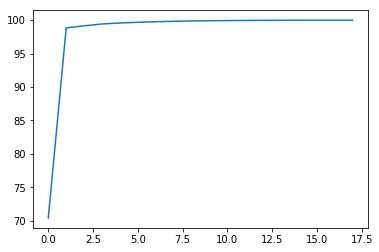

In [8]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(.9999)
pca_fit = pca.fit(X_data)
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(len(var1))
plt.plot(var1)
plt.show()

In [9]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train_pca, y_train)
logisticRegr.predict(X_train_pca[0].reshape(1,-1))
logisticRegr.predict(X_train_pca)
logisticRegr.score(X_test_pca, y_test)

0.5

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, logisticRegr.predict(X_test_pca)))
print(classification_report(y_test, logisticRegr.predict(X_test_pca)))

[[5 3]
 [3 1]]
             precision    recall  f1-score   support

          0       0.62      0.62      0.62         8
          1       0.25      0.25      0.25         4

avg / total       0.50      0.50      0.50        12



In [12]:
!pip install yellowbrick

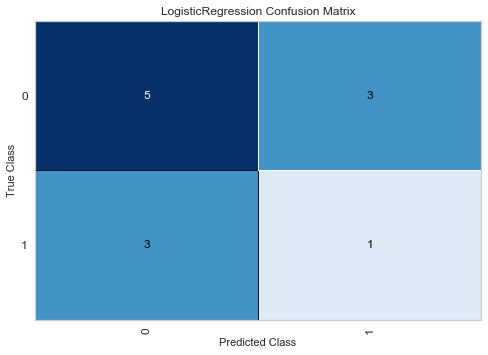

In [13]:
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

cm = ConfusionMatrix(logisticRegr, cmap='Blues')
cm.fit(X_train_pca, y_train)
cm.score(X_test_pca, y_test)
cm.poof()

#cm = ClassificationReport(logisticRegr, cmap='Blues')
#cm.fit(X_train_pca, y_train)
#cm.score(X_test_pca, y_test)
#cm.poof()

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(random_state=42)

random_classifier.fit(X_train_pca, y_train)
random_classifier.predict(X_test_pca)
random_classifier.score(X_test_pca, y_test)

0.75

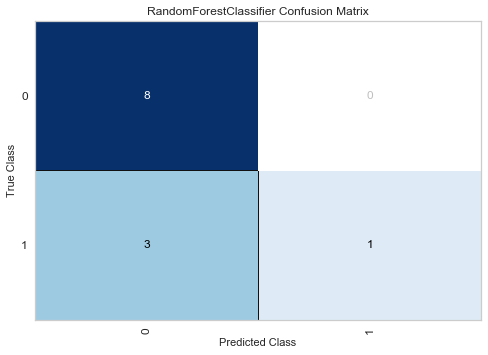

In [15]:
cmrf = ConfusionMatrix(random_classifier, cmap='Blues')
cmrf.fit(X_train_pca, y_train)
cmrf.score(X_test_pca, y_test)
cmrf.poof()

## Using oversampling techniques.
Perform oversampling before split.

In [16]:
# pre split
pre_oversampler=SMOTE(random_state=0)
pre_os_features, pre_os_labels = pre_oversampler.fit_sample(X_data,y_class)
print(pre_os_features.shape)

(72, 3650)


19


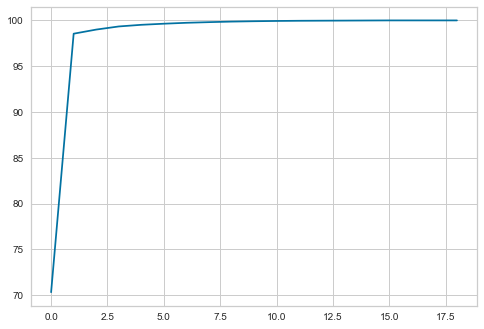

In [17]:
pca = PCA(.9999)
pca_fit = pca.fit(pre_os_features)
#Cumulative Variance explains
var2 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(len(var2))
plt.plot(var2)
plt.show()

(54, 3650) (18, 3650)


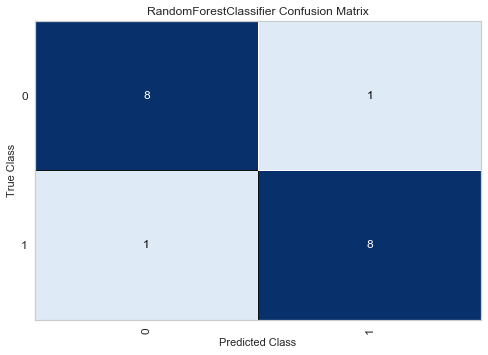

In [18]:
X_train, X_test, y_train, y_test = train_test_split(pre_os_features, pre_os_labels, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

cmrf = ConfusionMatrix(random_classifier, cmap='Blues')
cmrf.fit(X_train_pca, y_train)
cmrf.score(X_test_pca, y_test)
cmrf.poof()

Post oversampling i.e, after the split.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_class, test_size=0.25, random_state=42)

In [20]:
# post split
post_oversampler = SMOTE(random_state=0)
post_os_features, post_os_labels = post_oversampler.fit_sample(X_train, y_train)
print(post_os_features.shape, X_test.shape)

(56, 3650) (12, 3650)


19


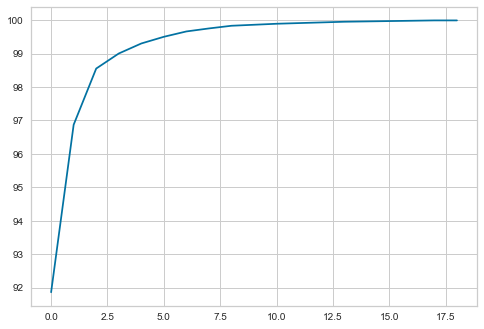

In [21]:
pca = PCA(.9999)
pca_fit = pca.fit(post_os_features)
#Cumulative Variance explains
var3 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(len(var3))
plt.plot(var3)
plt.show()

(56, 3650) (12, 3650)


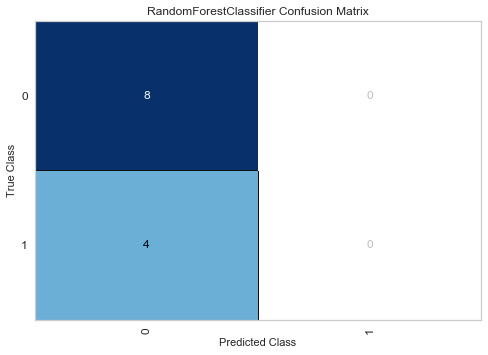

In [22]:
print(post_os_features.shape, X_test.shape)
X_train_pca = pca.transform(post_os_features)
X_test_pca = pca.transform(X_test)

cmrf = ConfusionMatrix(random_classifier, cmap='Blues')
cmrf.fit(X_train_pca, post_os_labels)
cmrf.score(X_test_pca, y_test)
cmrf.poof()

In [23]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest